In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
data=pd.read_csv("movies.csv")

In [ ]:
data.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [ ]:
data["review_title"][0]

'Some birds aren\'t meant to be caged.,An incredible movie. One that lives with you.,Don\'t Rent Shawshank.,This is How Movies Should Be Made,A classic piece of unforgettable film-making.,The Shawshank Redemption,Stephen King\'s best adapted movie,Eternal Hope,IMDb and the Greatest Film of All Time,All-time prison film classic,the shawshank redemption,My favorite movie of all time.,Simply known as "The Movie",Simply amazing. The best film of the 90\'s.,Prepare to be moved,Shawshank Redeems Hollywood,"I Had To Go To Prison To Learn To Be A Crook",Masterpiece,The UNIVERSALITY of Shawshank: Andy Dufresne as "EVERYMAN","I\'m a convicted murderer who provides sound financial planning".,never give up hope,Hope can set you free and so can this remarkable film,Shawshank Redemption- Prison Film is Redeemed by Quality ****,Two movies in one,A Sort of Secular Redemption'

In [ ]:
data["review_content"][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_sentence(sentence):
    cleaned_sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()
    words = cleaned_sentence.split()
    filtered_words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return lemmatized_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
title_list=data["review_title"].apply(lambda x: x.split(','))
title_len = title_list.apply(len)
title_combined_list=[]
for i in title_list:
  for j in i:
    title_combined_list.append(preprocess_sentence(j))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

def freq_itemset(lst, num, min_sup):
    te = TransactionEncoder()
    te_ary = te.fit(lst).transform(lst)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == num]
    return frequent_itemsets

In [ ]:
freq_itemset(title_combined_list, 2, 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
31,0.017530,"(ever, best)",2
32,0.019771,"(film, best)",2
33,0.017398,"(movie, best)",2
34,0.021484,"(best, one)",2
35,0.012917,"(ever, film)",2
36,0.013444,"(ever, made)",2
37,0.012653,"(ever, movie)",2
38,0.016476,"(ever, one)",2
39,0.020166,"(film, one)",2
40,0.015685,"(movie, one)",2


In [ ]:
freq_itemset(title_combined_list, 3, 0.005)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
106,0.006854,"(ever, film, best)",3
107,0.006327,"(ever, made, best)",3
108,0.006722,"(ever, movie, best)",3
109,0.007645,"(ever, best, one)",3
110,0.008567,"(film, best, one)",3
111,0.006195,"(movie, best, one)",3
112,0.005799,"(ever, made, film)",3
113,0.007249,"(ever, film, one)",3
114,0.005272,"(ever, movie, made)",3
115,0.007249,"(ever, made, one)",3


In [ ]:
content_list=data["review_content"].apply(lambda x: x.split('.,'))
content_len = content_list.apply(len)
content_combined_list=[]
for i in content_list:
  for j in i:
    content_combined_list.append(preprocess_sentence(j))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


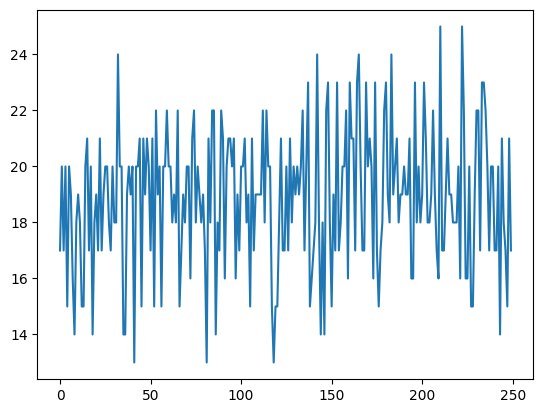

In [ ]:
plt.plot(content_len)

In [ ]:
freq_itemset(content_combined_list, 1, 0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_itemset(content_combined_list, 2, 0.01)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
94,0.013493,"(film, best)",2
95,0.012143,"(best, one)",2
96,0.011739,"(character, film)",2
97,0.010980,"(great, film)",2
98,0.012961,"(like, film)",2
99,0.010465,"(film, make)",2
100,0.016065,"(movie, film)",2
101,0.027534,"(film, one)",2
102,0.010128,"(film, see)",2
103,0.012152,"(story, film)",2


In [ ]:
all_comments = [comment for sublist in content_combined_list for comment in sublist]
text_data = ' '.join(all_comments)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


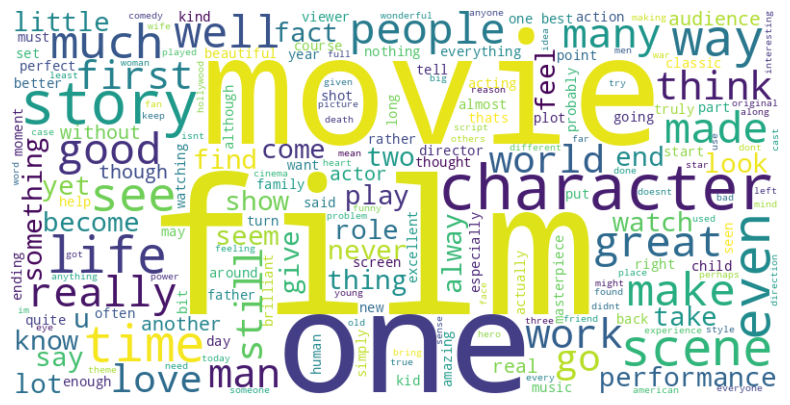

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

XXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
cast_list=data["cast_name"].apply(lambda x: x.split(','))
cast_len = cast_list.apply(len)

In [ ]:
from collections import Counter
all_actors = [actor for sublist in cast_list for actor in sublist]

# Count occurrences of each actor
actor_counts = Counter(all_actors)

In [ ]:
sortedl=dict(sorted(actor_counts.items(), key=lambda item: item[1], reverse=True))


In [ ]:
from itertools import combinations
all_connections = []

for names_list in cast_list:
    connections = list(combinations(names_list, 2))  # Generate all combinations of 2 actors
    all_connections.extend(connections)
connections_df = pd.DataFrame(all_connections, columns=['Actor1', 'Actor2'])
print(connections_df)

                  Actor1           Actor2
0            Tim Robbins   Morgan Freeman
1            Tim Robbins       Bob Gunton
2            Tim Robbins   William Sadler
3            Tim Robbins     Clancy Brown
4            Tim Robbins      Gil Bellows
...                  ...              ...
1075693     Bill Costner  William Rossman
1075694     Bill Costner       Jim Wilson
1075695     David Rambow  William Rossman
1075696     David Rambow       Jim Wilson
1075697  William Rossman       Jim Wilson

[1075698 rows x 2 columns]


In [ ]:
G = nx.from_pandas_edgelist(connections_df, 'Actor1', 'Actor2', create_using=nx.DiGraph())


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

In [ ]:
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity}")

avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

density = nx.density(G)
print(f"Density: {density}")

degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity: {degree_assortativity}")

Transitivity: 0.39988591545624985
Average Clustering Coefficient: 0.4784786924155523
Density: 0.003987384378685232
Degree Assortativity: 0.17862553225495845


In [ ]:
avg_neighbor_degree = nx.average_neighbor_degree(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
sorted_values = sorted(avg_neighbor_degree.items(), key=lambda x: x[1], reverse=True)
sorted_values[:10]

[('Octavio Solis', 319.0),
 ('Erik Per Sullivan', 319.0),
 ('Eduardo Aránega', 306.0),
 ('Alon Aboutboul', 217.27339901477833),
 ('Ben Mendelsohn', 216.80987654320987),
 ('Burn Gorman', 216.34653465346534),
 ('Daniel Sunjata', 215.8833746898263),
 ('Aidan Gillen', 215.42039800995025),
 ('Sam Kennard', 214.95760598503742),
 ('Aliash Tepina', 214.495)]

In [ ]:
sorted_values = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_values[:10]

[('Arnold Montey', 0.31564080577362763),
 ('Jimmy Star', 0.2905418899754634),
 ('Ernest Pierce', 0.2823081952871053),
 ('Joseph Oliveira', 0.2804218477592242),
 ('Franz Strassmann', 0.2752659209426939),
 ('Chuen Tsou', 0.27281537585493654),
 ('Kit Sinnett', 0.2663417906651584),
 ('Chris Wilson', 0.2661053730066789),
 ('Gary Sievers', 0.2633946704831247),
 ('Marc Radz', 0.261679775548342)]

In [ ]:
sorted_values = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_values[:10]

[('Arnold Montey', 0.07731614218887467),
 ('Sam Harris', 0.04334485501477718),
 ('Linus Roache', 0.02966403388453148),
 ('John Ratzenberger', 0.029084200224991596),
 ('Samuel L. Jackson', 0.026999620686842852),
 ('Benedict Cumberbatch', 0.026752810279270095),
 ('Harvey Keitel', 0.02492913713416081),
 ('Bob Harks', 0.022446172028867256),
 ('Treat Williams', 0.021974865893336814),
 ('Mark Falvo', 0.020313483170695375)]

In [ ]:
unique_genre = []
for i in data['genre'].values:
    unique_genre += i.split(',')
len(list(set(unique_genre)))

21

In [ ]:
data["year"]

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
245    1975
246    2011
247    1992
248    1982
249    1990
Name: year, Length: 250, dtype: int64

In [ ]:
movies = pd.read_csv("imdb.csv")

In [ ]:
movies["main_genre"].value_counts()

Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: main_genre, dtype: int64

In [ ]:
selected_genres = ['Action', 'Drama', 'Comedy','Crime','Biography','Animation','Adventure',"Horror"]
movies = movies[movies['main_genre'].isin(selected_genres)]
mean_ratings = movies.groupby(['Year', 'main_genre'])['Rating'].mean().reset_index()

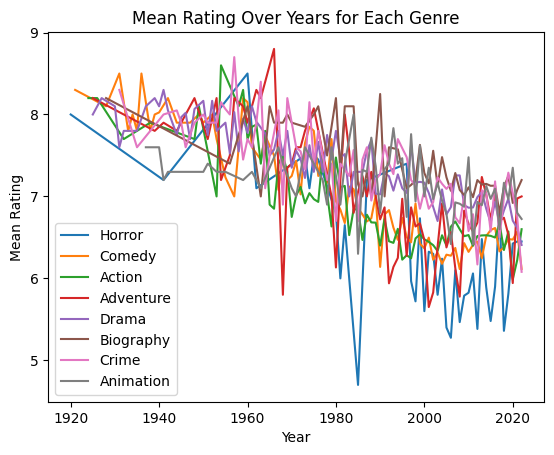

In [ ]:
genres = mean_ratings['main_genre'].unique()

for genre in genres:
    genre_data = mean_ratings[mean_ratings['main_genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Rating'], label=genre)
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.title('Mean Rating Over Years for Each Genre')
plt.legend()

In [ ]:
df = movies
df['all_genres'] = (df['main_genre'] + ',' + df['side_genre'].str.strip())
df_expanded = df.assign(all_genres=df['all_genres'].str.split(',')).explode('all_genres')
selected_genres = ['Action', 'Drama', 'Comedy','Crime','Biography','Animation','Adventure',"Horror"]
df_expanded = df_expanded[df_expanded['all_genres'].isin(selected_genres)]


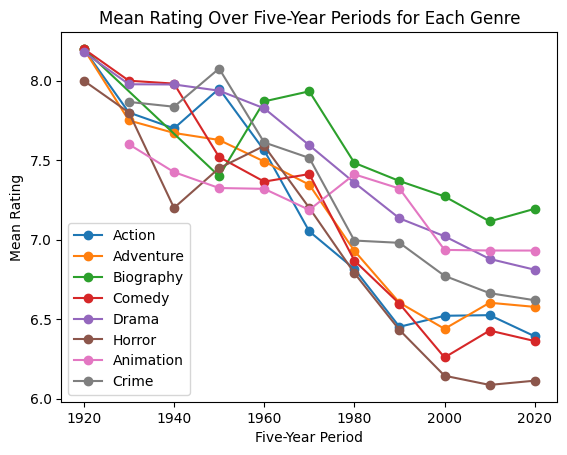

In [ ]:
df_expanded['FiveYearPeriod'] = ((df_expanded['Year']+1) // 10) * 10

# Group by the new column and 'Genre' to calculate mean ratings
mean_ratings = df_expanded.groupby(['FiveYearPeriod', 'all_genres'])['Rating'].mean().reset_index()

# Plotting line plots for each genre
genres = mean_ratings['all_genres'].unique()

for genre in genres:
    genre_data = mean_ratings[mean_ratings['all_genres'] == genre]
    plt.plot(genre_data['FiveYearPeriod'], genre_data['Rating'], label=genre,  marker='o')

# Adding labels and legend
plt.xlabel('Five-Year Period')
plt.ylabel('Mean Rating')
plt.title('Mean Rating Over Five-Year Periods for Each Genre')
plt.legend()

In [ ]:
df_expanded

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,all_genres
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama",Action
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama",Adventure
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama",Drama
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama",Action
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama",Crime
...,...,...,...,...,...,...,...,...,...,...,...
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi",Comedy
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi",Family
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi",Sci-Fi
5561,Cumali Ceber: Allah Seni Alsin,2017,Gökhan Gök,"Halil Söyletmez, Doga Konakoglu, Emre Keskin, ...",1.0,100,Not Rated,Gross Unkown,Comedy,Comedy,Comedy


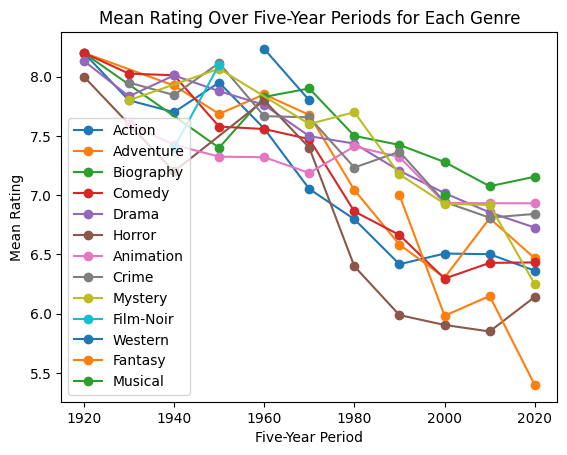

In [ ]:

movies['FiveYearPeriod'] = ((movies['Year']+1) // 10) * 10

# Group by the new column and 'Genre' to calculate mean ratings
mean_ratings = movies.groupby(['FiveYearPeriod', 'main_genre'])['Rating'].mean().reset_index()

# Plotting line plots for each genre
genres = mean_ratings['main_genre'].unique()

for genre in genres:
    genre_data = mean_ratings[mean_ratings['main_genre'] == genre]
    plt.plot(genre_data['FiveYearPeriod'], genre_data['Rating'], label=genre,  marker='o')

# Adding labels and legend
plt.xlabel('Five-Year Period')
plt.ylabel('Mean Rating')
plt.title('Mean Rating Over Five-Year Periods for Each Genre')
plt.legend()


Text(0.5, 1.0, 'Mean Rating Over Five-Year Periods with Confidence Intervals for Each Genre')

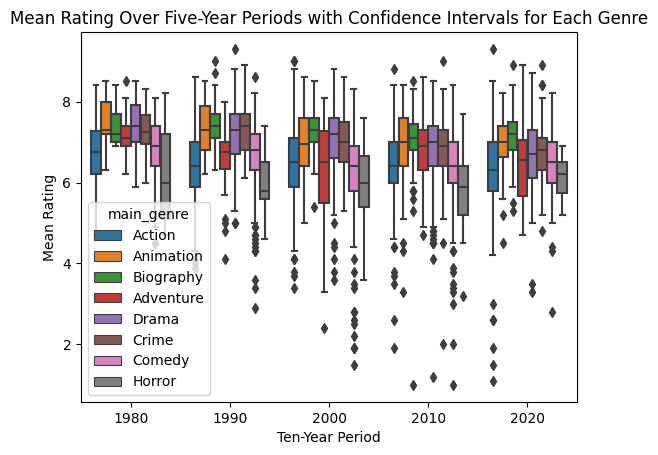

In [ ]:
import seaborn as sns
movies = movies[movies["Year"]>1980]
ci_ratings = movies.groupby(['FiveYearPeriod', 'main_genre'])['Rating'].agg(['mean', 'std']).reset_index()

# Merge mean and confidence interval data
merged_data = pd.merge(mean_ratings, ci_ratings, on=['FiveYearPeriod', 'main_genre'], suffixes=('_mean', '_ci'))

# Plotting with confidence intervals
sns.boxplot(x='FiveYearPeriod', y='Rating', hue='main_genre', data=movies)
#sns.lineplot(x='FiveYearPeriod', y='mean', hue='main_genre', data=merged_data, marker='o', linewidth=2)


# Adding labels and title
plt.xlabel('Ten-Year Period')
plt.ylabel('Mean Rating')
plt.title('Mean Rating Over Five-Year Periods with Confidence Intervals for Each Genre')


In [ ]:
import pandas as pd
data = pd.read_csv("imdb.csv")

In [ ]:
data = data[data["Total_Gross"] != "Gross Unkown"]

In [ ]:
data["Total_Gross"] = data["Total_Gross"].str[1:-1].astype(float)

In [ ]:
data["Runtime(Mins)"] = data["Runtime(Mins)"].astype(float)
data["Rating"] = data["Rating"].astype(float)
data["Year"] = data["Year"].astype(int)

In [ ]:
data["genres"] = data['main_genre']+","+data['side_genre']

In [ ]:
selected_genres = ['Action', 'Drama', 'Comedy','Crime','Biography','Animation','Adventure',"Horror"]
data = data[data['main_genre'].isin(selected_genres)]

In [ ]:
data[selected_genres] = 0

In [ ]:
data["Genre"] = data["main_genre"]

In [ ]:
for genre in selected_genres:
  data[genre] = np.where(data["genres"].str.contains(genre), 1, 0)

In [ ]:
data.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,genres,Genre,Action,Drama,Comedy,Crime,Biography,Animation,Adventure,Horror
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152.0,UA,534.86,Action,"Crime, Drama","Action, Crime, Drama",Action,1,1,0,1,0,0,0,0
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201.0,U,377.85,Action,"Adventure, Drama","Action, Adventure, Drama",Action,1,1,0,0,0,0,1,0
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148.0,UA,292.58,Action,"Adventure, Sci-Fi","Action, Adventure, Sci-Fi",Action,1,0,0,0,0,0,1,0
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179.0,UA,342.55,Action,"Adventure, Drama","Action, Adventure, Drama",Action,1,1,0,0,0,0,1,0
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178.0,U,315.54,Action,"Adventure, Drama","Action, Adventure, Drama",Action,1,1,0,0,0,0,1,0


In [ ]:
df = data.iloc[:,[1,4,5,7,12,13,14,15,16,17,18,19]]
df.head()

,Year,Rating,Runtime(Mins),Total_Gross,Action,Drama,Comedy,Crime,Biography,Animation,Adventure,Horror
1,2008,9.0,152.0,534.86,1,1,0,1,0,0,0,0
2,2003,9.0,201.0,377.85,1,1,0,0,0,0,1,0
3,2010,8.8,148.0,292.58,1,0,0,0,0,0,1,0
4,2002,8.8,179.0,342.55,1,1,0,0,0,0,1,0
5,2001,8.8,178.0,315.54,1,1,0,0,0,0,1,0


In [ ]:
df["Runtime"] = df["Runtime(Mins)"]

<ipython-input-84-741b76353264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Runtime"] = df["Runtime(Mins)"]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
y = df['Rating']  # Assuming 'Action' is your target variable
X = df.drop("Rating",axis=1)
# Create a Random Forest Classifier
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire dataset
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

In [ ]:
feature_importances

array([0.23008695, 0.23781068, 0.29830584, 0.02487561, 0.10183021,
       0.02181631, 0.01953241, 0.01052586, 0.02319252, 0.01724322,
       0.01478037])

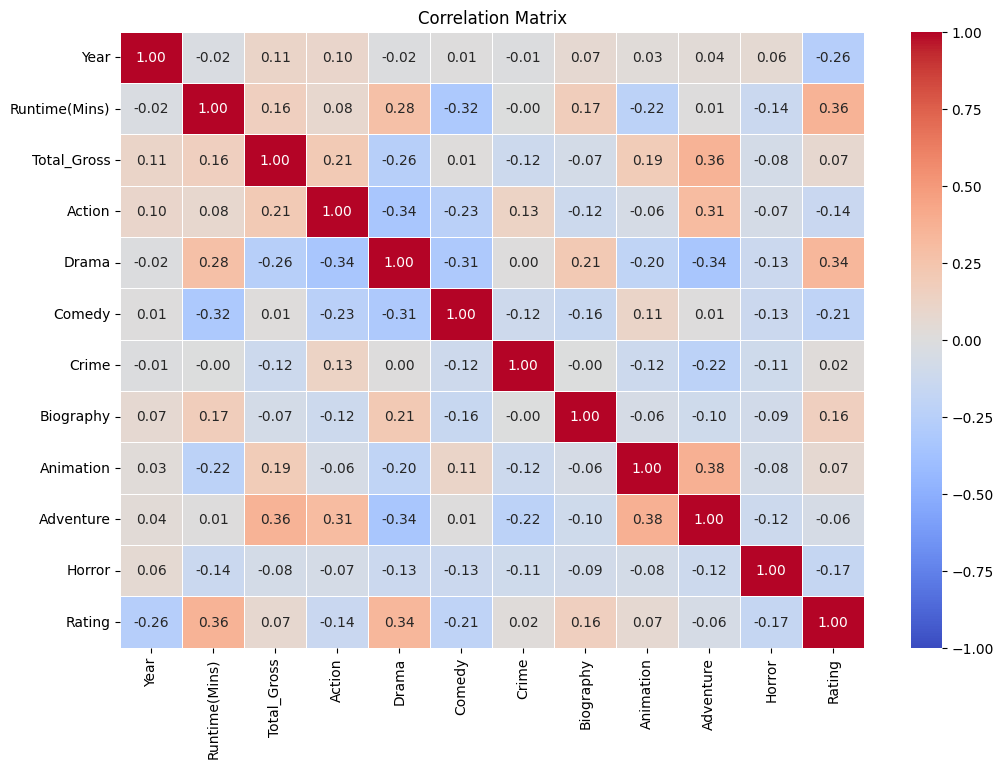

In [ ]:
import seaborn as sns
df_corr = pd.concat([X, y], axis=1)

# Calculate Pearson correlation coefficients
correlation_matrix = df_corr.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,vmin=-1)
plt.title('Correlation Matrix')
plt.show()

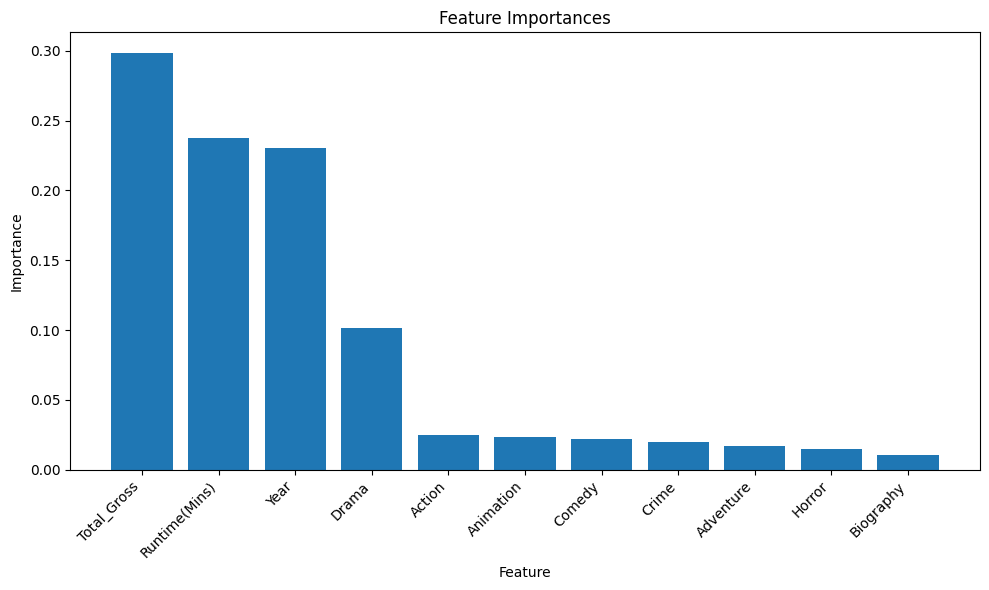

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
X = df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,1]

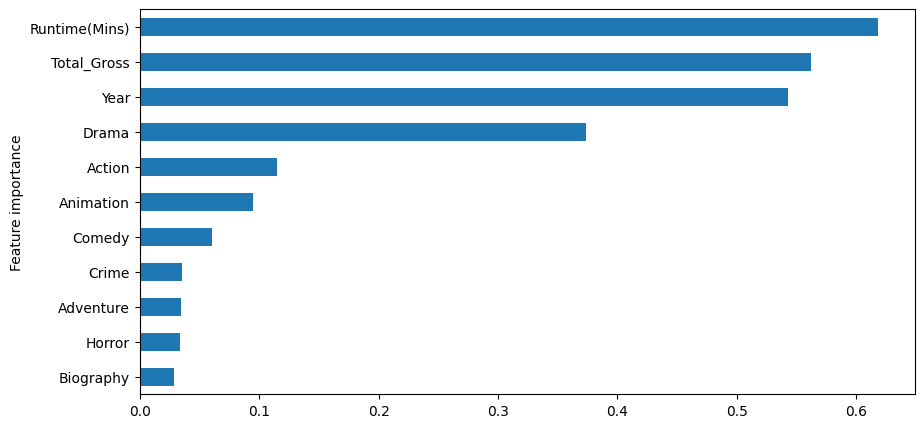

In [ ]:
from sklearn.inspection import permutation_importance
# result = permutation_importance(
#     rf_classifier, X, y, n_repeats=10, random_state=42, n_jobs=2
# )
forest_importances = pd.Series(result.importances_mean, index = rf_classifier.feature_names_in_)
plt.figure(figsize=(10,5))
forest_importances.sort_values(ascending = True).plot.barh()
plt.ylabel("Feature importance")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# create a scaler object
scaler = StandardScaler()

# assuming X is your feature matrix
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std = sm.add_constant(X_std)
y = y.iloc[:,1]
# Then you can fit your model
model = sm.OLS(y, X_std)

In [ ]:
y = y.reset_index()

In [ ]:
X_std

,const,Year,Total_Gross,Action,Drama,Comedy,Crime,Biography,Animation,Adventure,Horror
0,1.0,0.399882,6.417612,1.543425,0.913661,-0.814820,1.896068,-0.289646,-0.252242,-0.531390,-0.300806
1,1.0,0.052081,4.323953,1.543425,0.913661,-0.814820,-0.527407,-0.289646,-0.252242,1.881856,-0.300806
2,1.0,0.539002,3.186915,1.543425,-1.094498,-0.814820,-0.527407,-0.289646,-0.252242,1.881856,-0.300806
3,1.0,-0.017480,3.853243,1.543425,0.913661,-0.814820,-0.527407,-0.289646,-0.252242,1.881856,-0.300806
4,1.0,-0.087040,3.493076,1.543425,0.913661,-0.814820,-0.527407,-0.289646,-0.252242,1.881856,-0.300806
...,...,...,...,...,...,...,...,...,...,...,...
4659,1.0,0.191201,-0.487557,-0.647910,-1.094498,1.227265,-0.527407,-0.289646,-0.252242,-0.531390,-0.300806
4660,1.0,0.399882,-0.525293,-0.647910,-1.094498,1.227265,-0.527407,-0.289646,-0.252242,-0.531390,-0.300806
4661,1.0,0.399882,-0.714111,-0.647910,-1.094498,1.227265,-0.527407,-0.289646,-0.252242,-0.531390,-0.300806
4662,1.0,0.052081,-0.648905,-0.647910,-1.094498,1.227265,-0.527407,-0.289646,-0.252242,-0.531390,-0.300806


In [ ]:
X_std = pd.DataFrame(X_std, columns = X.columns)

(4664, 11)

In [ ]:
y

,index,Rating
0,1,9.0
1,2,9.0
2,3,8.8
3,4,8.8
4,5,8.8
...,...,...
4659,5555,2.2
4660,5557,1.9
4661,5558,1.9
4662,5559,1.9


In [ ]:
import statsmodels.api as sm
from patsy import dmatrix
from statsmodels.gam.api import GLMGam, BSplines
formula = 'Rating ~  Runtime+ Total_Gross+ Year+Action + Animation + Comedy + Crime + Adventure + Horror + Biography'

#X = dmatrix(formula, data=df, return_type='dataframe')

model = sm.OLS(y, X_std)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     168.7
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.86e-303
Time:                        06:09:47   Log-Likelihood:                -5394.3
No. Observations:                4664   AIC:                         1.081e+04
Df Residuals:                    4653   BIC:                         1.088e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7454      0.011    598.156      

ValueError: ignored

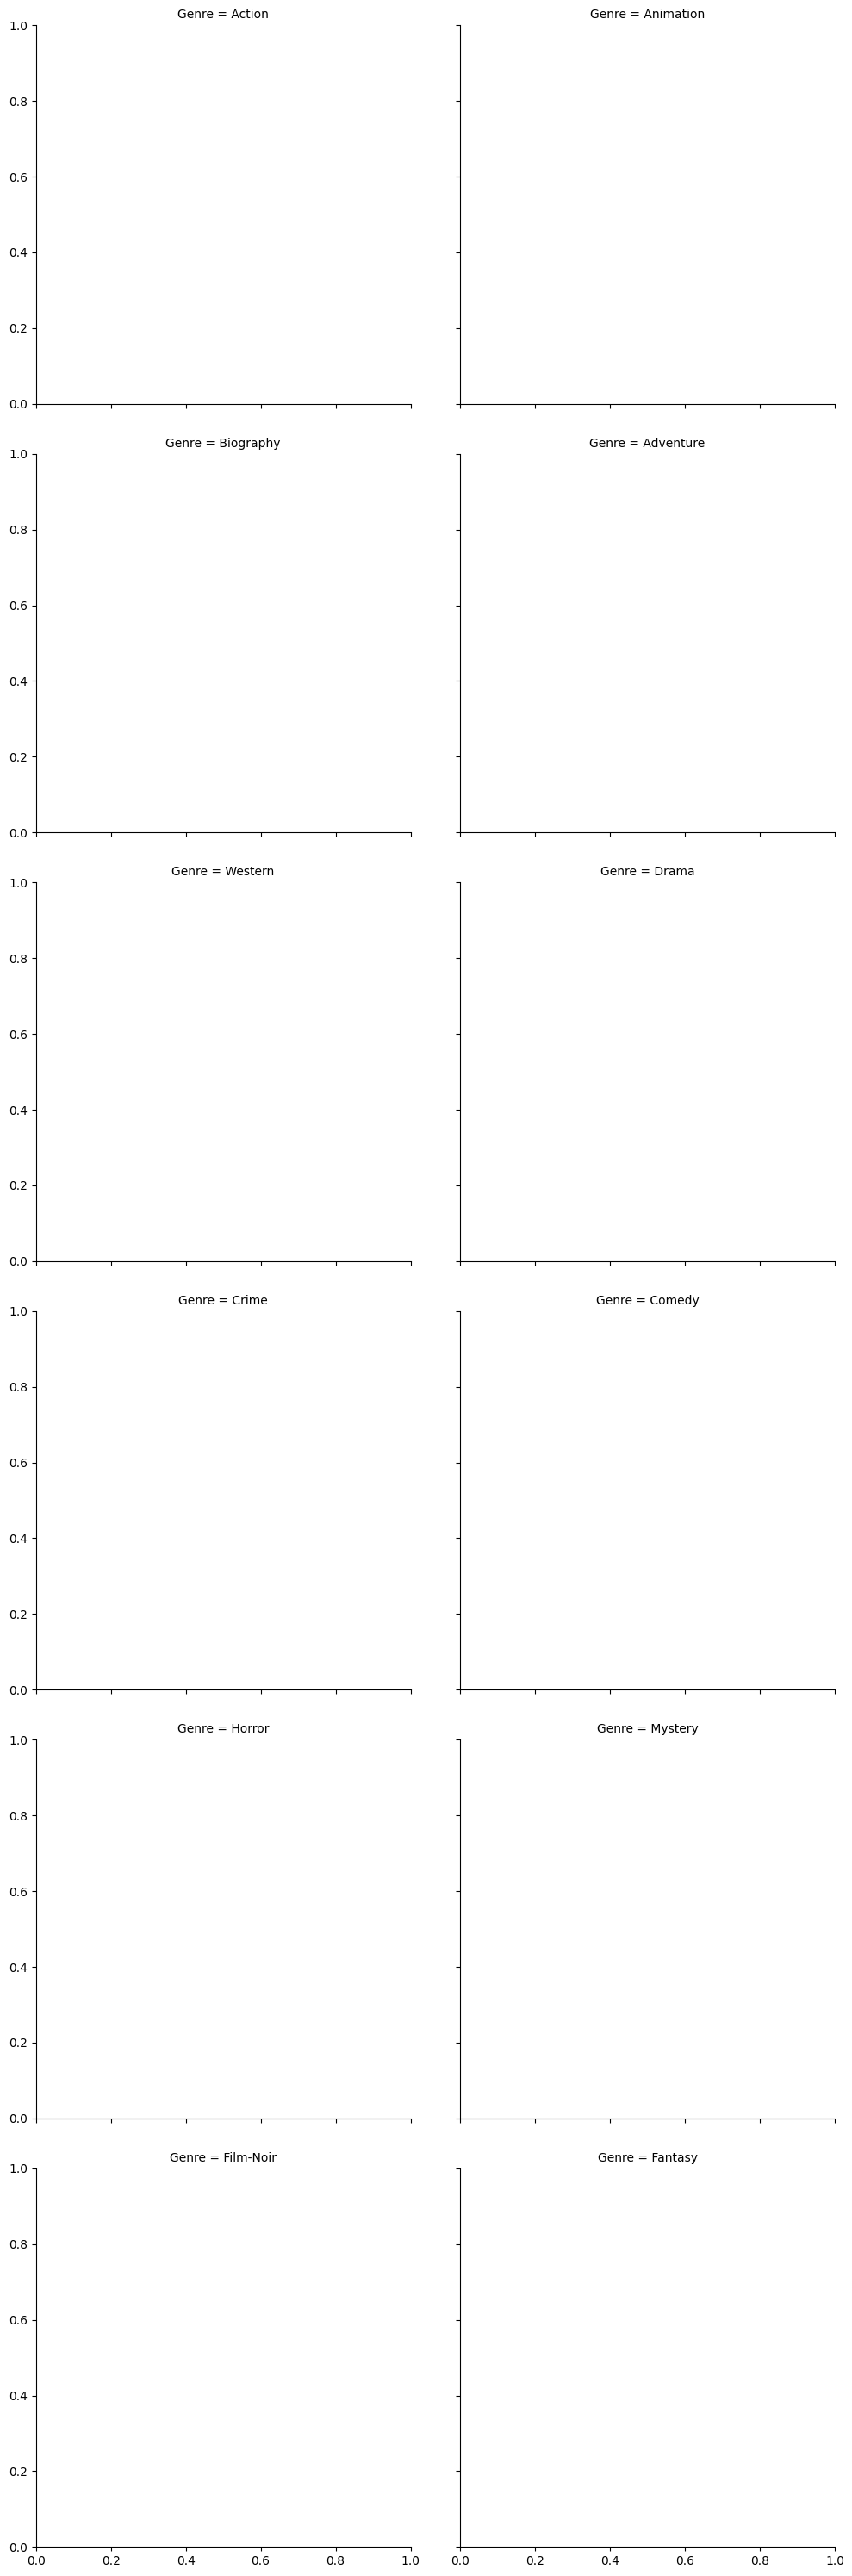

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df, col="Genre", col_wrap=2, height=5)
g.map(sns.scatterplot, "Year", "Rating", hue="Runtime", size="Total_Gross", sizes=(20, 200), palette="viridis")

# Customize the plot
g.set_axis_labels("Year", "Rating")
g.set_titles(col_template="{col_name}")

# Add legend
g.add_legend()

# Show the plot
plt.show()

KeyError: ignored

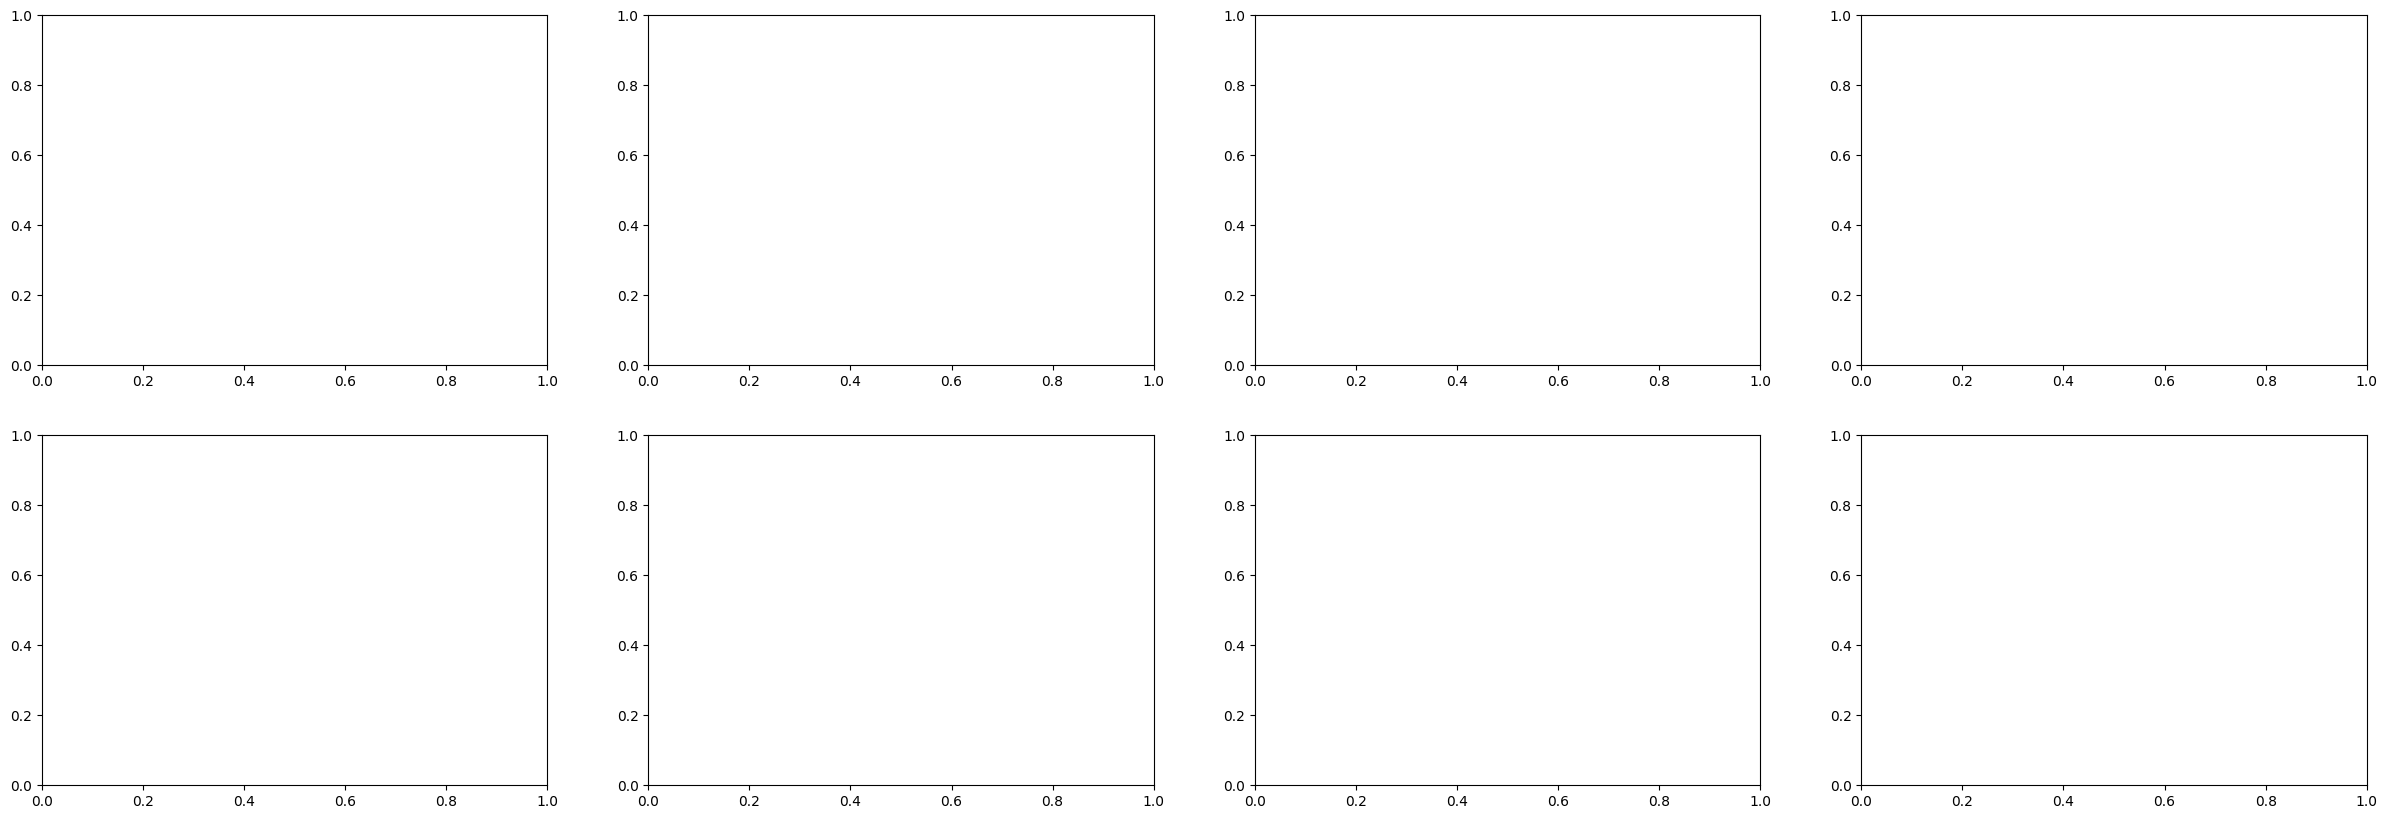

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(30,10))
genres = df['Genre'].unique()
for i, genre in enumerate(genres):
    subset = df[df['Genre']==genre]
    i1 = int(i/4)
    i2 = int(i - i1*4)
    scatter = ax[i1,i2].scatter(subset['Year'], subset['Rating'],
                          c=subset['Rating'], s=subset['Total_Gross'],
                          alpha=0.6, cmap='jet',vmin=1, vmax=10)

    ax[i1,i2].set_title(f"Movies in {genre} Genre")
    ax[i1,i2].set_xlabel('Year')
    ax[i1,i2].set_ylabel('Runtime')

    # Add colorbar
    fig.colorbar(scatter, ax=ax[i1,i2], label='Runtime')

# Tightly layout
plt.tight_layout()
plt.show()

In [ ]:
df_coef = df_coef.iloc[:-1,:]

In [ ]:
df_coef

,coef,err,varname
Intercept,35.9875,3.0895,Intercept
Runtime,0.0133,0.0013,Runtime
Total_Gross,0.0011,0.0001,Total_Gross
Year,-0.0153,0.0017,Year
Action,-0.3196,0.0554,Action
Animation,0.6496,0.1056,Animation
Comedy,-0.3087,0.0503,Comedy
Crime,0.0303,0.0563,Crime
Adventure,-0.2197,0.0653,Adventure
Horror,-0.4084,0.0836,Horror


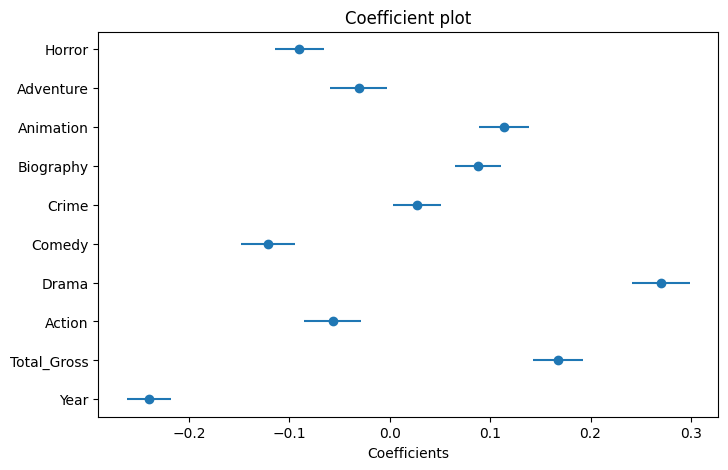

In [ ]:
results_summary = result.summary()
results_as_html = results_summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

# Create a new dataframe with coefficients and their confidence interval
df_coef = pd.DataFrame({'coef': summary_df['coef'],
                        'err': (summary_df['[0.025']-summary_df['coef']).abs(),
                        'varname': summary_df.index })
df_coef = df_coef.iloc[1:,:]
# Sort values by coefficient values

fig, ax = plt.subplots(figsize=(8, 5))

# Create error bars for each parameter in the coefficient
plt.errorbar(df_coef['coef'], np.arange(df_coef.shape[0]), xerr= df_coef['err'], fmt="o")

# Add labels and title
plt.yticks(np.arange(df_coef.shape[0]), df_coef["varname"])
plt.xlabel(r"Coefficients")
plt.title("Coefficient plot")

# Display the plot
plt.show()

In [ ]:
df[df["Rating"]==max(df["Rating"])]

,Year,Rating,Runtime(Mins),Total_Gross,Action,Drama,Comedy,Crime,Biography,Animation,Adventure,Horror,Runtime
3448,1994,9.3,142.0,28.34,0,1,0,0,0,0,0,0,142.0


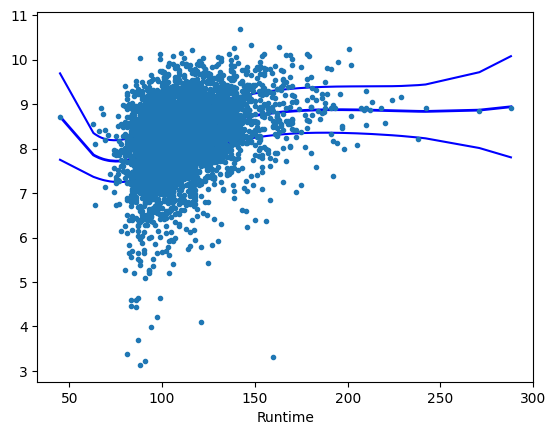

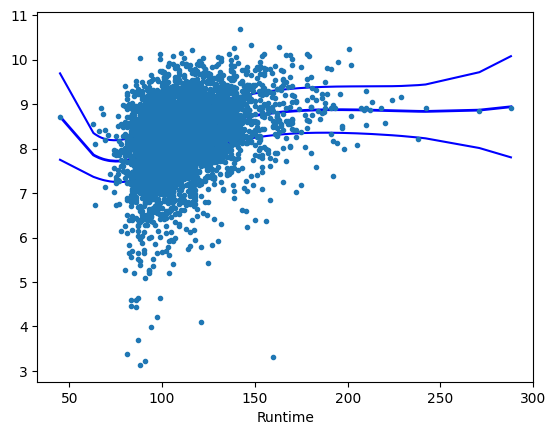

In [ ]:
result.plot_partial(0, cpr=True)